# Wafer fault Prediction
Brief: In electronics, a wafer (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.



# 
Problem Statement
Data: Wafers data

Problem Statement: Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

Solution: Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [24]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [25]:
## load the feature store dataset as dataframe
df=pd.read_csv('wafer_23012020_041211.csv')
print('shape of the datafreme is : ' ,df.shape)

shape of the datafreme is :  (100, 592)


In [26]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [27]:
df.isnull().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [30]:
## test csv file
df.drop(['Unnamed: 0', 'Good/Bad'],axis=1).iloc[:100].to_csv('test.csv')

In [31]:
## replace Unnamed:0  to  wafer
df.rename(columns={"Unnamed: 0": "Wafer"}, inplace= True)

In [32]:
## train test split
from sklearn.model_selection import train_test_split

df ,df_test=train_test_split(df,test_size=0.25,random_state=40)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 68 to 70
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 347.5+ KB


In [34]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,74.00000,75.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,75.000000,75.000000,...,21.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000
mean,3017.88973,2486.528000,2202.230876,1511.542246,1.195776,100.0,96.969374,0.122203,1.462000,0.000267,...,69.362710,0.499171,0.013664,0.003587,2.738840,0.023421,0.014820,0.004615,76.142936,-0.84000
std,74.09659,64.086515,33.960636,478.509393,0.344162,0.0,5.902116,0.002221,0.074882,0.010805,...,30.109408,0.003552,0.004757,0.000963,0.960433,0.011951,0.007463,0.002462,51.800704,0.54624
min,2825.67000,2286.090000,2114.666700,988.207100,0.758800,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.00000
25%,2972.78000,2447.940000,2189.355600,1111.543600,0.866200,100.0,90.859450,0.120800,1.406150,-0.007050,...,47.213600,0.496800,0.011250,0.003000,2.256050,0.013400,0.009500,0.002800,33.787600,-1.00000
50%,3003.90000,2489.150000,2200.988900,1308.647900,1.159450,100.0,99.402750,0.122050,1.453200,0.002100,...,65.218600,0.499300,0.012700,0.003400,2.537900,0.021800,0.013900,0.003800,65.036500,-1.00000
75%,3071.78500,2527.470000,2213.222250,2018.755350,1.383000,100.0,101.471400,0.124275,1.507750,0.007850,...,101.387600,0.501450,0.014550,0.003850,2.937600,0.028000,0.019000,0.005900,104.303400,-1.00000
max,3221.21000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,114.287800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.00000


# Insight:
From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [35]:
## looking at cats in our Target feature

df['Good/Bad'].value_counts()

Good/Bad
-1    69
 1     6
Name: count, dtype: int64

# Insight:
Havily imbalance data

# Analyze Missing Data:
Firstly, we'll check the missing data in the target feature and drop those records. As if we already know a value of target feature then there's no need for a ML algorithm, damn right? Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [36]:
df['Good/Bad'].isna().sum()

0

In [37]:
df.isna().sum().sum()

1782

In [38]:
## check missing values in dependen feature variables

df.isna().sum().sum()/(df.shape[0] * (df.shape[1]-1))

0.04020304568527919

=> 40 out of total cells we having missing value

## visualization

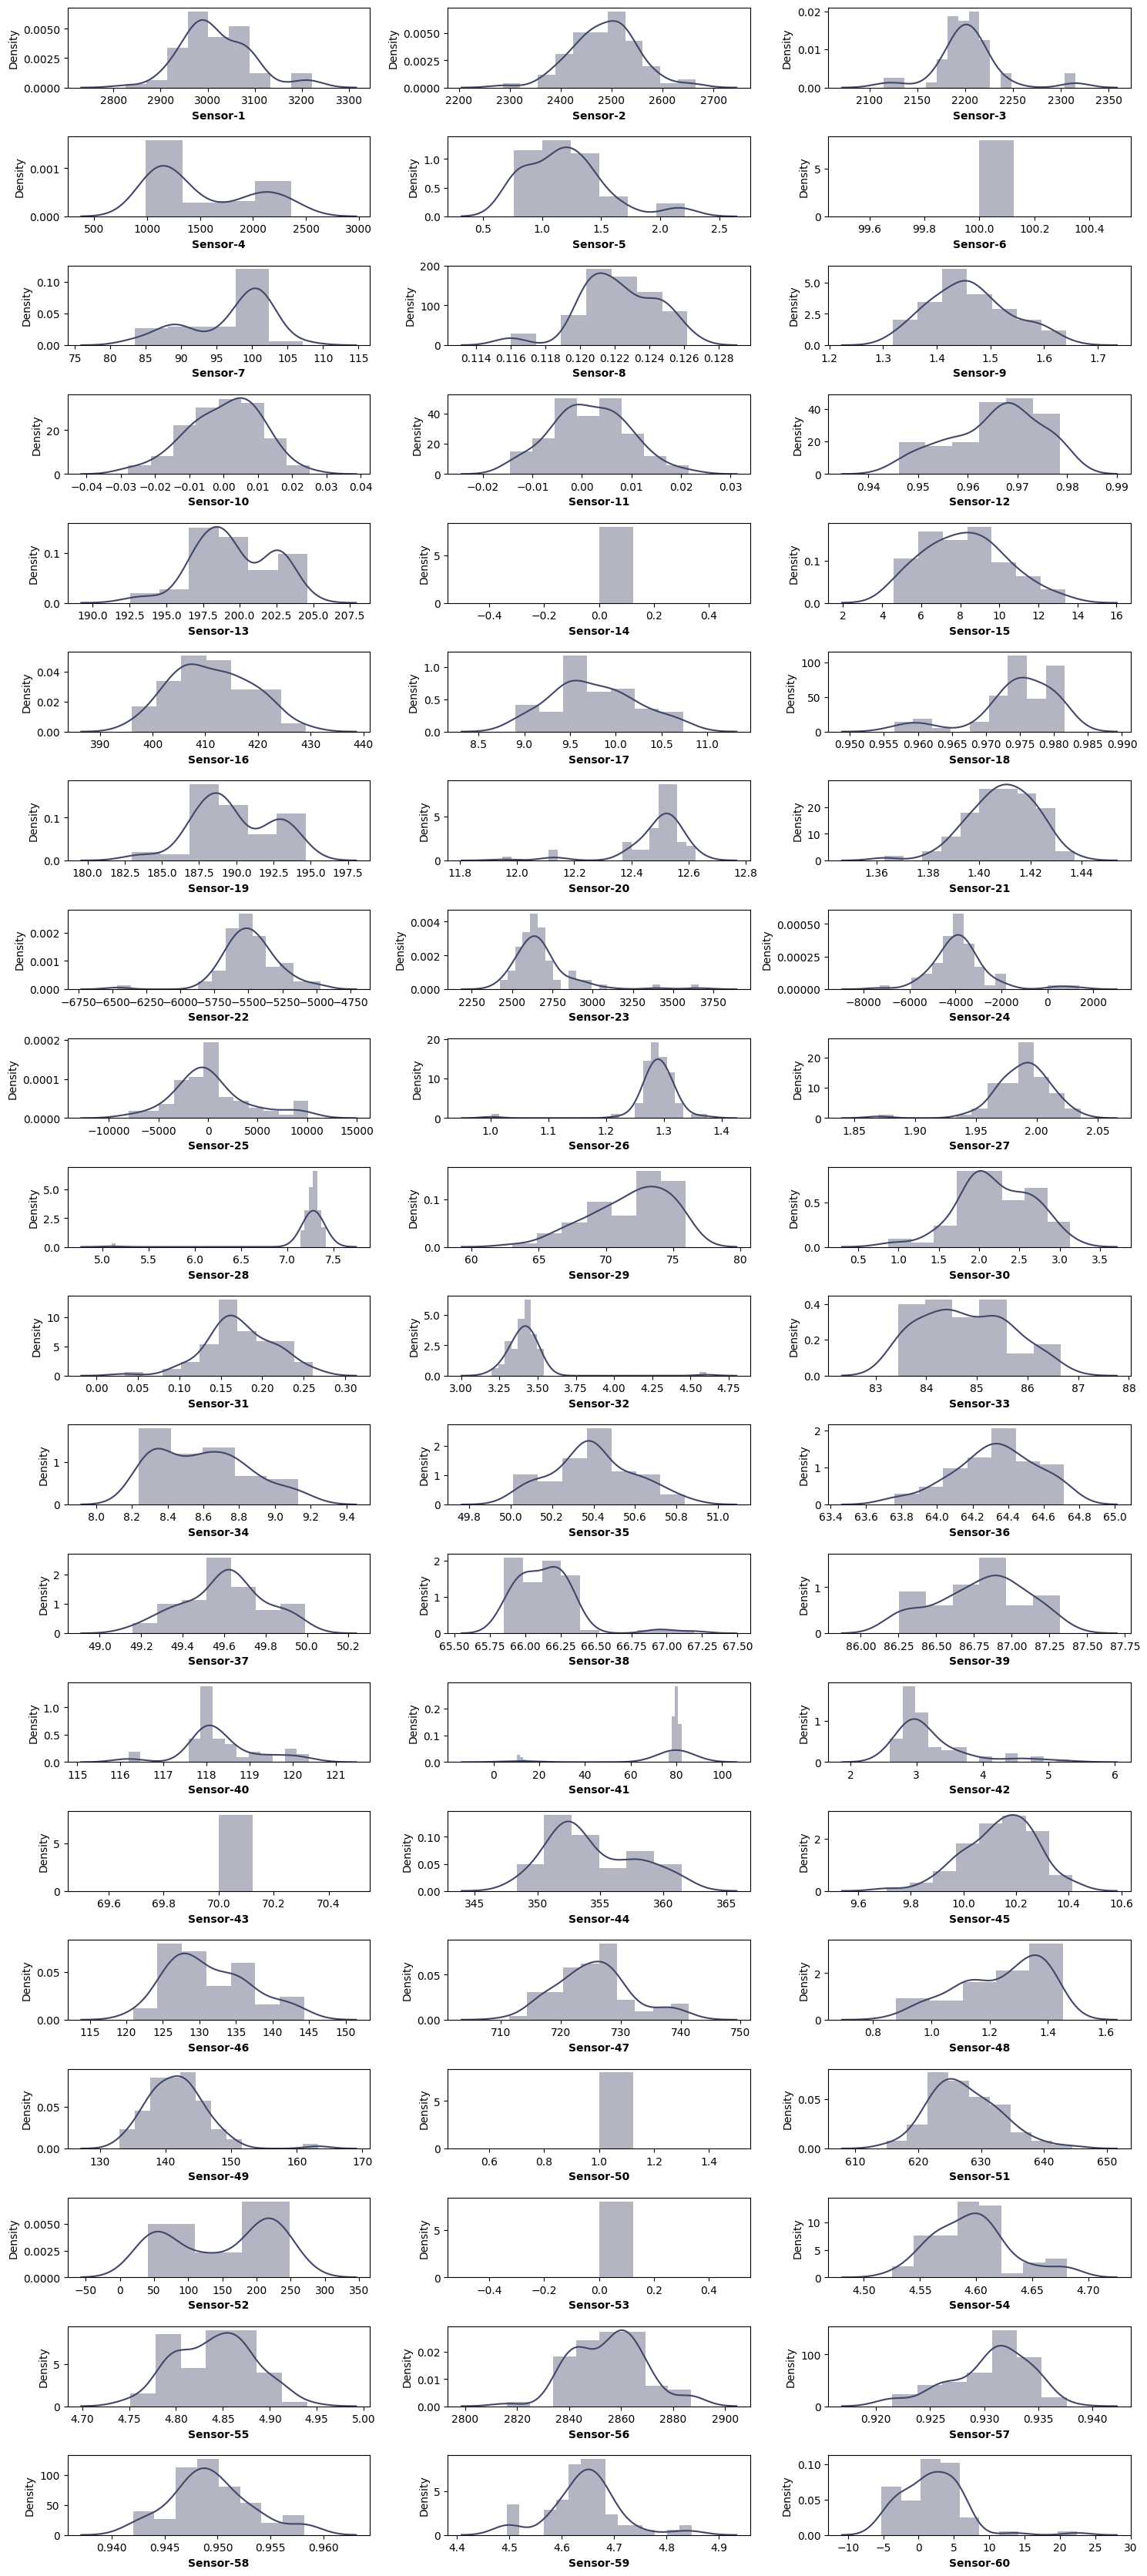

In [39]:
# lets have a look at distribution first 60 sensor 

plt.figure(figsize=(15,100))

for i,col in enumerate(df.columns[1:61]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=df[col],color='#424769')
    plt.xlabel(col, weight ='bold')
    plt.tight_layout()

In [40]:
# Select 50 random sensors

random_50_sensors_idx = []

for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))
  
        

In [41]:
random_50_sensors_idx

[169,
 364,
 315,
 339,
 23,
 318,
 139,
 501,
 357,
 389,
 281,
 291,
 557,
 549,
 217,
 474,
 180,
 134,
 428,
 465,
 320,
 459,
 48,
 523,
 18,
 489,
 381,
 376,
 4,
 115,
 364,
 556,
 438,
 150,
 365,
 439,
 126,
 113,
 196,
 60,
 98,
 212,
 67,
 491,
 125,
 196,
 520,
 590]

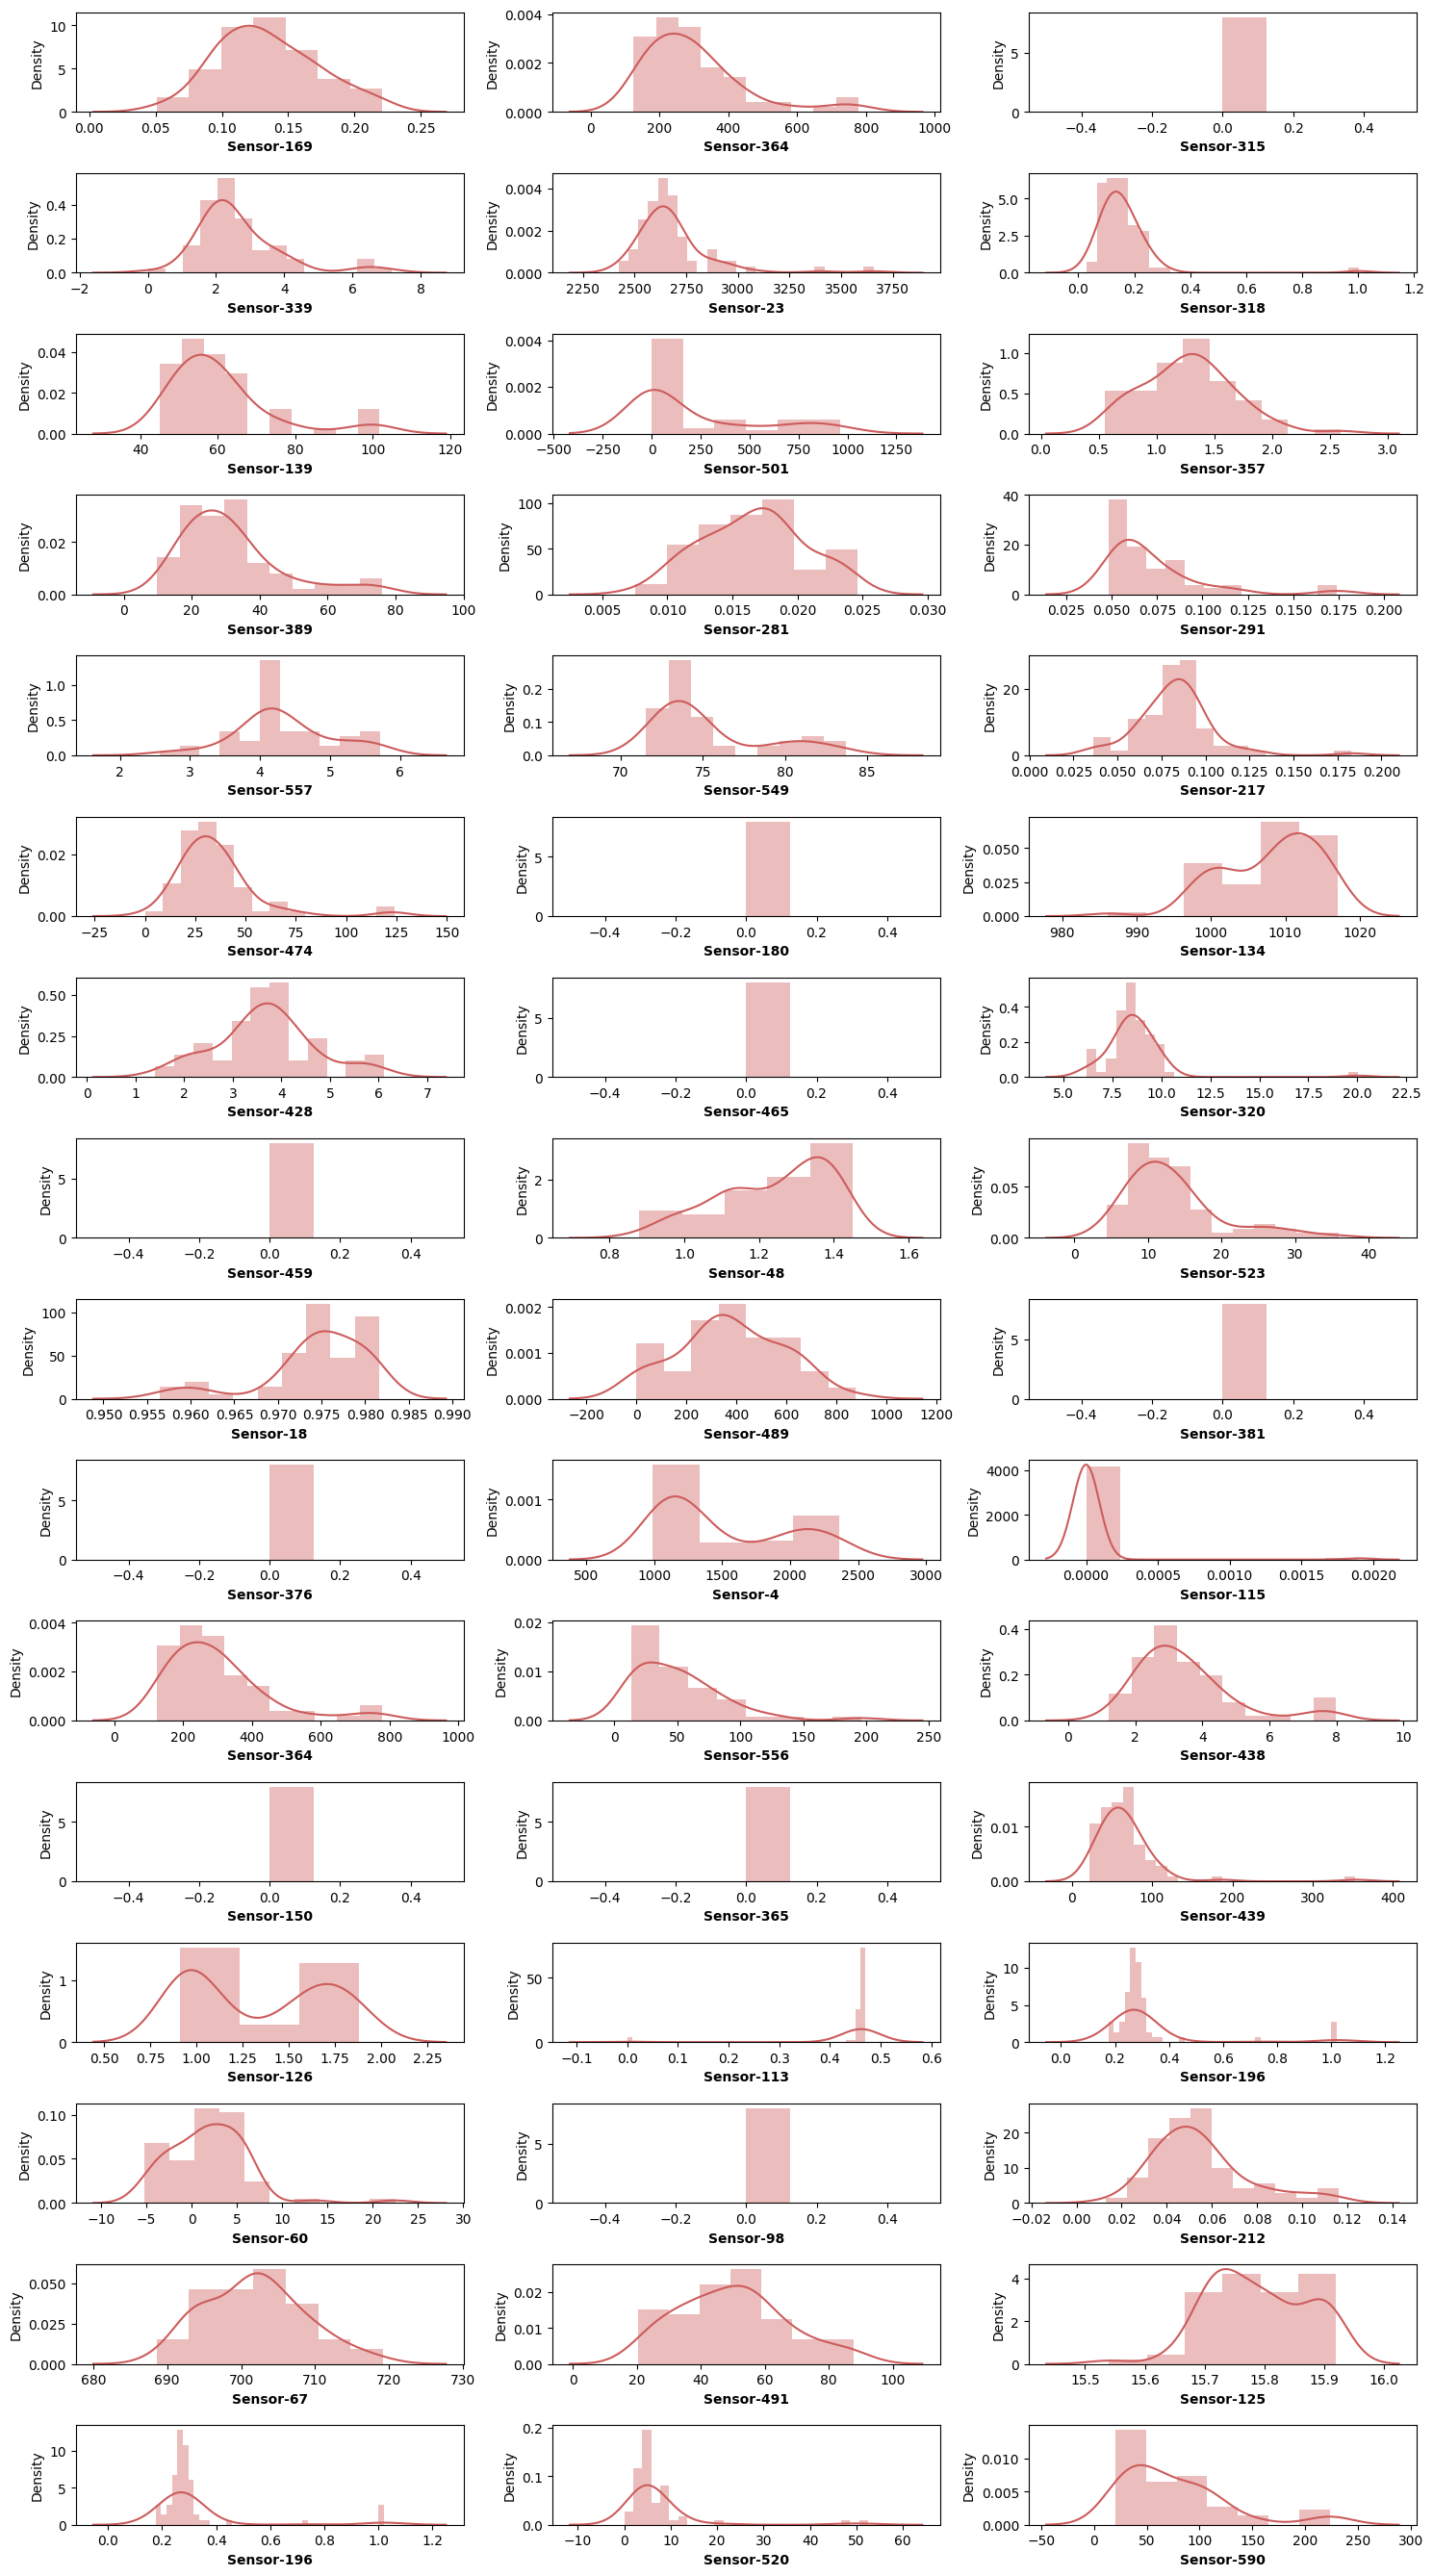

In [42]:
# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

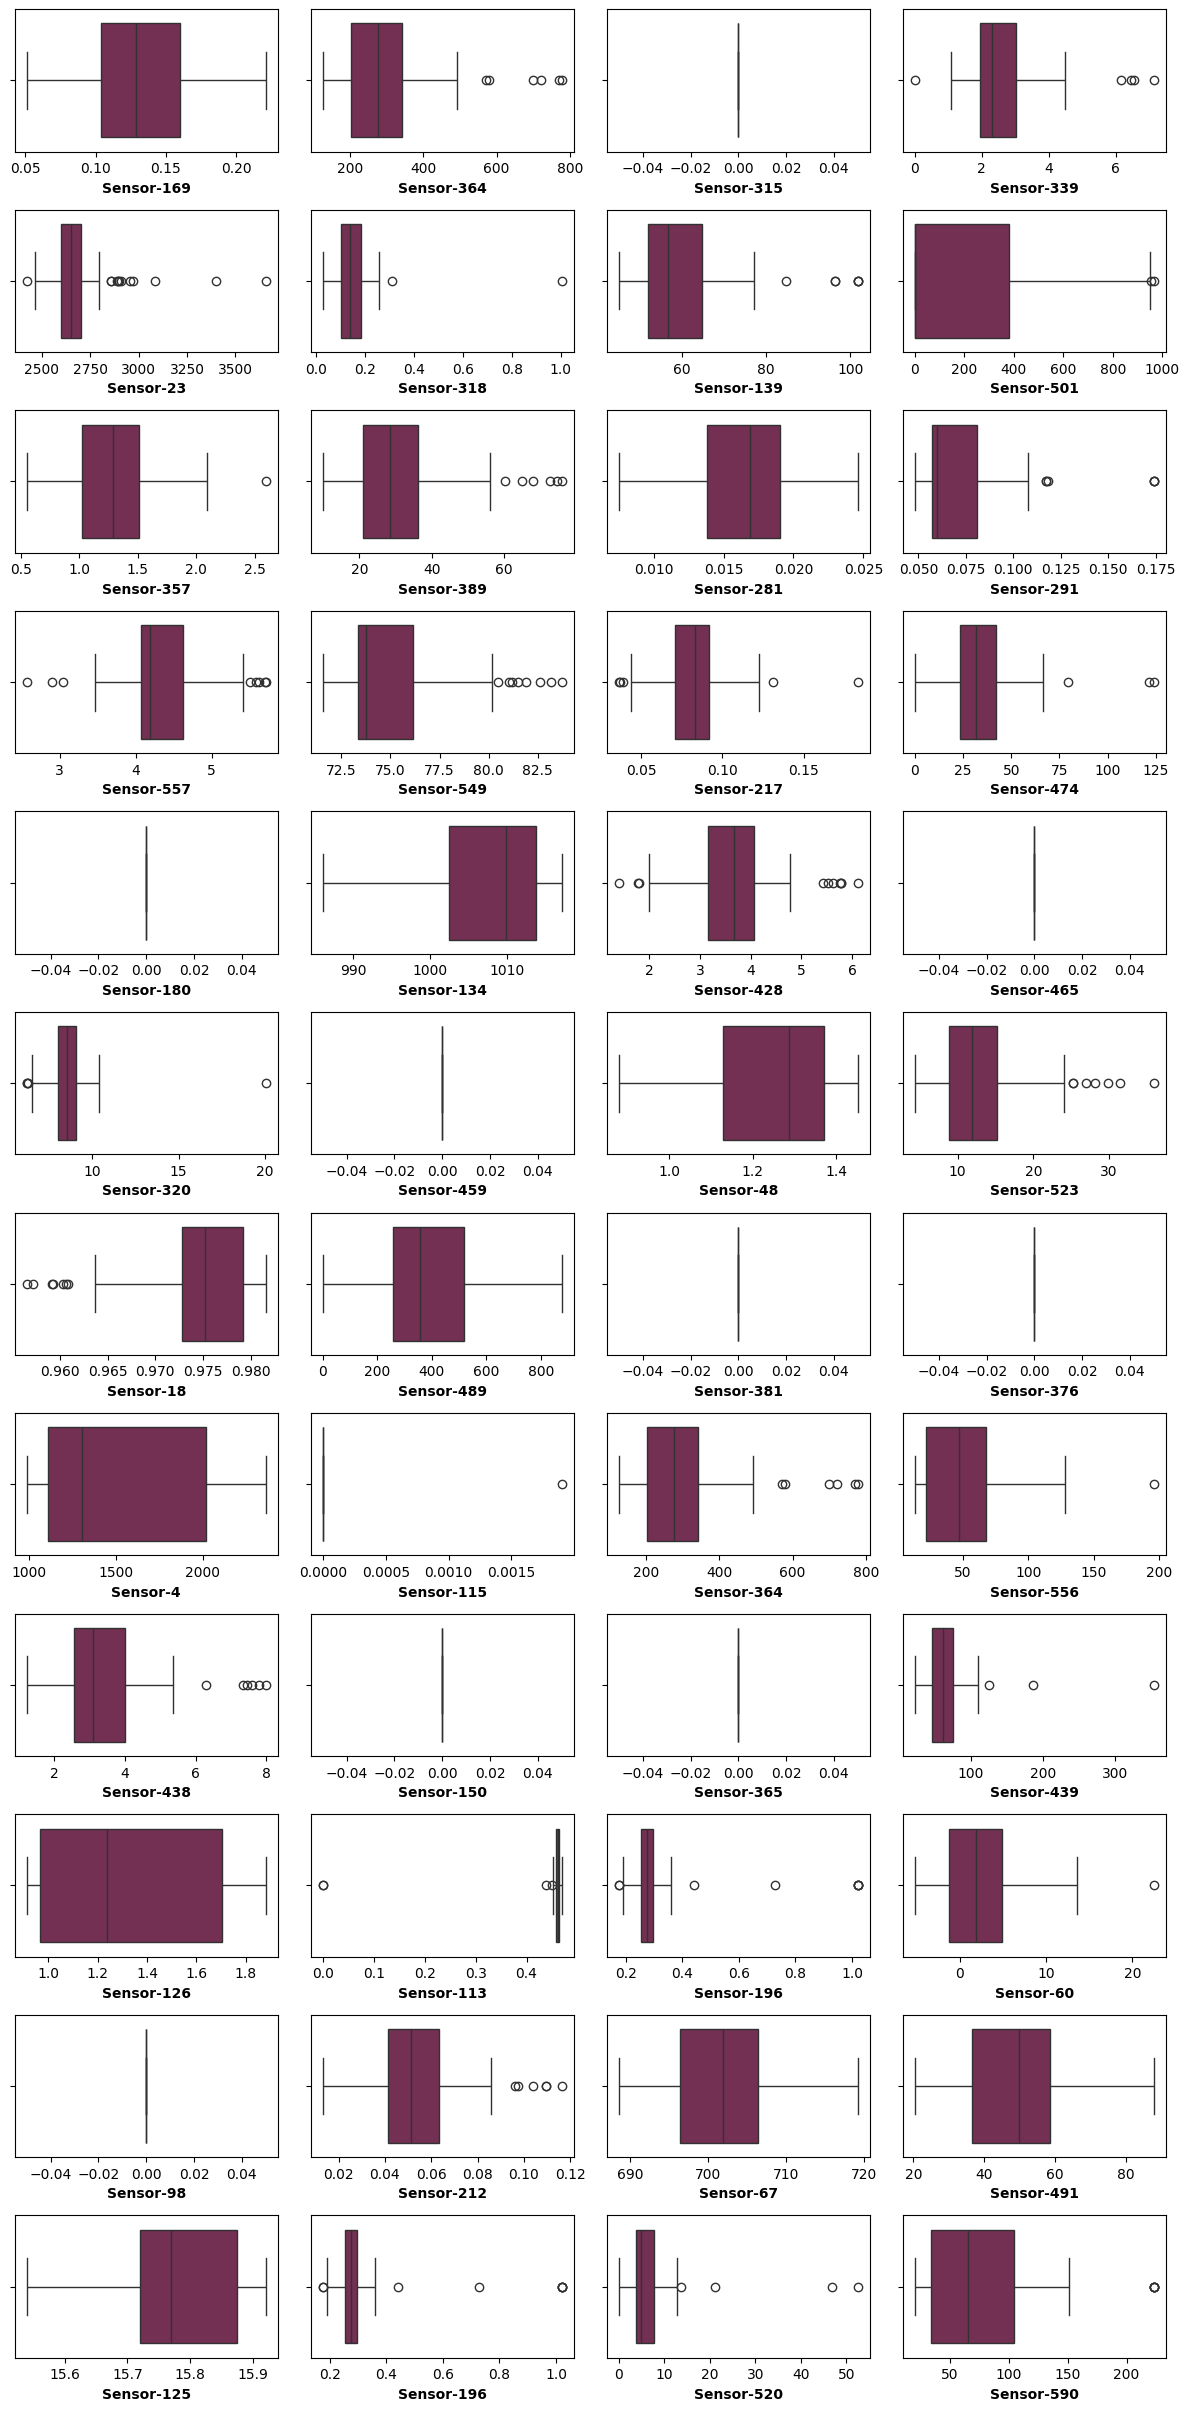

In [43]:
plt.figure(figsize=(12,100))

for i,col in enumerate(df.columns[random_50_sensors_idx]):
    plt.subplot(50,4, i+1)
    sns.boxplot(x=df[col],color='#7E2553')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

# insight
pretty much data follows normal distribution(random) but data also has  right skeeness and  left sekeeness, basicaly we can say tis dataset has lot of outliers

we can straight away drop or fill them by col mean  and for others that do have outliers, we gotta go ahead with the Robust Scaling.

# Get Columns to Drop:
Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [44]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop 

In [45]:

cols_to_drop_1 = get_redundant_cols(df, missing_thresh=.7)
cols_to_drop_1

['Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-579',
 'Sensor-580',
 'Sensor-581',
 'Sensor-582']

In [46]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=df)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [47]:
cols_drop=cols_to_drop_1 +cols_to_drop_2

=> Features that are not gonna contribute to ML algorithm in anyway,

# Saparate Features and labels out :

In [48]:
# saparate features and labels
x,y=df.drop(cols_drop,axis=1),df[['Good/Bad']]

In [49]:
print('Shape of the Dependen variable: ',x.shape)
x.head()

Shape of the Dependen variable:  (75, 461)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
68,2948.09,2480.05,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.4463,0.0073,0.0046,...,16.4543,0.5015,0.0126,0.0029,2.5045,0.0338,0.0069,0.0025,20.3091,-1
77,3086.05,2417.34,2216.5000,1111.5436,0.8373,99.9867,0.1205,1.4678,0.0024,-0.0017,...,23.1735,0.5007,0.0099,0.0027,1.9719,0.0187,0.0190,0.0053,101.3876,-1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,17.6552,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
76,2966.39,2507.22,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3487,0.0050,0.0006,...,96.9601,0.4983,0.0107,0.0028,2.1477,0.0211,0.0115,0.0036,54.4761,-1
80,2986.28,2483.71,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.5794,-0.0034,-0.0127,...,17.8615,0.4969,0.0114,0.0028,2.2966,0.0368,0.0146,0.0038,39.6224,-1


In [50]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (75, 1)


,Good/Bad
68,-1
77,-1
2,-1
76,-1
80,-1


## Data transformation

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
impute=KNNImputer(n_neighbors=3)
pipeline=Pipeline(
    steps=[
        ('impute',impute),
        ('scaler',RobustScaler())
    ]
)
pipeline

Pipeline(steps=[('impute', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [52]:
## Trasfrom Features
x_train=pipeline.fit_transform(x)
print('shape of x_train data : ',x_train.shape)

shape of x_train data :  (75, 461)


In [53]:
x_train

array([[-0.56477157, -0.11442223,  0.        , ..., -0.41935484,
        -0.63428905,  0.        ],
       [ 0.83583756, -0.90292971,  0.64854819, ...,  0.48387097,
         0.51550291,  0.        ],
       [ 0.69350254,  0.14497674,  0.19884056, ...,  0.5483871 ,
        -0.44314749,  0.        ],
       ...,
       [ 0.84060914, -1.62341255,  0.13565445, ...,  0.        ,
         0.69844347,  0.        ],
       [-0.13340102,  0.2189111 , -0.27642249, ...,  0.29032258,
         0.15552543,  0.        ],
       [ 0.63614213, -0.20181064, -1.23298623, ..., -0.58064516,
        -0.57266315,  0.        ]])

# Shall we cluster "Wafers" instances?
Let's see whether clustering of data instances do us any good.

In [54]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [56]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=x_train, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..


WCSS for n_clusters=1: 1394172.7890266338
WCSS for n_clusters=2: 406545.9412751357
WCSS for n_clusters=3: 125617.92697437653
WCSS for n_clusters=4: 83523.2840415539
WCSS for n_clusters=5: 60369.21526596302
WCSS for n_clusters=6: 50286.61059248503
WCSS for n_clusters=7: 43589.50534303018
WCSS for n_clusters=8: 40622.90330536906
WCSS for n_clusters=9: 36783.44723250338
WCSS for n_clusters=10: 33886.57703152977
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.56477157, -0.11442223,  0.        , ..., -0.63428905,
         0.        ,  0.        ],
       [ 0.83583756, -0.90292971,  0.64854819, ...,  0.51550291,
         0.        ,  0.        ],
       [ 0.69350254,  0.14497674,  0.19884056, ..., -0.44314749,
         0.        ,  0.        ],
       ...,
       [ 0.84060914, -1.62341255,  0.13565445, ...,  0.69844347,
         0.        ,  0.        ],
       [-0.13340102,  0.2189111 , -0.27642249, ...,  0.15552543,
         0.        ,  0.        ],
       [ 0.63614213, -0.20181064, -1.23298623, ..., -0.57266315,
         0.        ,  0.        ]])

In [57]:
## clusters
np.unique(X_clus[:,-1])

array([0., 1., 2.])


=> So the dataset was divided into 3 optimal clusters.

Let's have a look at their shapes..

In [58]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(71, 463)

=> Perhaps we were wrong about dividing the Wafers dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

Let's take look at another clusters anyway..

In [59]:
wafers_clus[wafers_clus[:,-2]==1].shape

(1, 463)

In [60]:
wafers_clus[wafers_clus[:,-2]==2].shape

(3, 463)


# Resampling of Training Instances:
Resampling is imperative in this case as the target variable is highly imbalanced.

In [61]:
!pip install imbalanced-learn

In [62]:
from imblearn.combine import SMOTETomek

x,y=x_train[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
x_res, y_res = resampler.fit_resample(x, y)

In [63]:
print("Before resampling, Shape of training instances: ", np.c_[x, y].shape)
print("After resampling, Shape of training instances: ", np.c_[x_res, y_res].shape)

Before resampling, Shape of training instances:  (75, 461)
After resampling, Shape of training instances:  (138, 461)


In [64]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 138, 1: 138



# Prepare the Test set:
Do exactly the same to test set whatever's been done to the test set.

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {x_train.shape, y_train.shape}")
print(f"test set: {x_test.shape, y_test.shape}")

train set: ((92, 460), (92, 1))
test set: ((46, 460), (46, 1))


In [66]:
## prepare training and test sets
x_pre=x_train
y_pre=y_train
x_test_pre=x_test
y_test_pre=y_test

print(x_pre.shape, y_pre.shape)
print(x_test_pre.shape, y_test_pre.shape)

(92, 460) (92, 1)
(46, 460) (46, 1)


In [67]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# shortlisted based Models
svc_l=SVC(kernel='linear')
svc_r=SVC(kernel='rbf')
random=RandomForestClassifier(random_state=40)
# xg=XGBClassifier(objective='binary:logistic')

In [68]:
## function to display scores

def display_score(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

## Svc linear kernal

In [69]:
## svc scores
svc_score=cross_val_score(svc_l,x_pre,y_pre,scoring='roc_auc',cv=10,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s


In [70]:
display_score(svc_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [71]:
## perfoming on test set using cv
svc_score=cross_val_score(svc_l,x_test_pre,y_test_pre,scoring='roc_auc',cv=10,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s


In [72]:
display_score(svc_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [73]:
# pradiction using cross validation
svc_pred=cross_val_predict(svc_l,x_test_pre,y_test_pre,cv=5)

#Auc
svc_auc=roc_auc_score(y_test_pre,svc_pred)
svc_auc

0.9523809523809523

# svc rbf kernel

In [74]:
svc_rbf_score=cross_val_score(svc_r,x_pre,y_pre,scoring='roc_auc',cv=10,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.4s
[CV] END ................................ score: (test=0.840) total time=   0.5s
[CV] END ................................ score: (test=1.000) total time=   0.4s
[CV] END ................................ score: (test=1.000) total time=   0.5s
[CV] END ................................ score: (test=0.950) total time=   0.4s
[CV] END ................................ score: (test=1.000) total time=   0.6s
[CV] END ................................ score: (test=1.000) total time=   0.4s
[CV] END ................................ score: (test=0.900) total time=   0.3s
[CV] END ................................ score: (test=1.000) total time=   0.5s
[CV] END ................................ score: (test=1.000) total time=   0.2s


In [75]:
display_score(svc_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [76]:
svc_rbf_score=cross_val_score(svc_r,x_test_pre,y_test_pre,scoring='roc_auc',cv=10,verbose=3)

[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.2s
[CV] END ................................ score: (test=1.000) total time=   0.3s


In [77]:
display_score(svc_rbf_score)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [78]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_pred=cross_val_predict(svc_r,x_test_pre,y_test_pre,cv=5,verbose=3)

# Auc
auc=roc_auc_score(y_test_pre,svc_rbf_pred)
auc

0.8571428571428572

## random forest

In [79]:
random_f=cross_val_score(random,x_pre,y_pre,scoring='roc_auc',verbose=3)

[CV] END ................................ score: (test=1.000) total time=   3.8s
[CV] END ................................ score: (test=1.000) total time=   5.2s


[CV] END ................................ score: (test=1.000) total time=   5.4s
[CV] END ................................ score: (test=1.000) total time=  10.1s
[CV] END ................................ score: (test=1.000) total time=   9.7s


In [80]:
display_score(random_f)

Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [81]:
# ## Performance on test set using cross-validation

# # Predictions using cross-validation
# # random_clf_preds = cross_val_predict(random_f, x_test_pre, y_test_pre, cv=5)

# # AUC score
# random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
# random_clf_auc

In [83]:
models={
    'svm linear':SVC(kernel='linear'),
    'svm rbf':SVC(kernel='rbf'),
    'random':RandomForestClassifier(random_state=40)
    # 'Xgboost':XGBClassifier()
}

In [84]:
def display_score(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [85]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    print(list(models.keys())[i])
    
    # model traning

    print('Traning model cross val score: ')
    print('\n')
    model_score=cross_val_score(model,x_test_pre,y_test_pre,scoring='roc_auc',cv=10,verbose=0)

    score=display_score(model_score)
   


    ## perfoming on test set using cv
    print('perfomance on test data cross val score : ')
    print('\n')
    pred_score=cross_val_score(model,x_test_pre,y_test_pre,scoring='roc_auc',cv=10,verbose=0)

    test_score=display_score(pred_score)

    # pradiction using cross validation
    prediction=cross_val_predict(model,x_test_pre,y_test_pre,cv=5)

    #Auc
    auc=roc_auc_score(y_test_pre,svc_pred)
    print('auc :', auc)
    
    
    
    
    print('='*45)
    print('\n')

svm linear
Traning model cross val score: 




Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
perfomance on test data cross val score : 


Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
auc : 0.9523809523809523


svm rbf
Traning model cross val score: 


Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
perfomance on test data cross val score : 


Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
auc : 0.9523809523809523


random
Traning model cross val score: 


Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
perfomance on test data cross val score : 


Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0
auc : 0.9523809523809523


